In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [35]:
input_size = 1
output_size = 1
hidden_size = 16
num_time_step = 50
lr = 0.01

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.net = nn.RNN(
            input_size=input_size,
            hidden_size = hidden_size,
            num_layers = 1,
            batch_first = True#转换为（batch，seq_len，emb_size）
        )
        for p in self.net.parameters():
            nn.init.normal_(p,mean=0.0,std=0.001)
        self.linear = nn.Linear(hidden_size,output_size)
    def forward(self,x,hidden_prev):
        out,hidden_prev = self.net(x,hidden_prev)#out（batch，hidden_size,embed_size）
        out = out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim=0)
        return out,hidden_prev

epoch:0,loss:0.5257904529571533
epoch:1000,loss:0.0012203371152281761
epoch:2000,loss:0.0008573596132919192
epoch:3000,loss:0.0007693944498896599
epoch:4000,loss:0.0002501471317373216
epoch:5000,loss:0.0001314039691351354


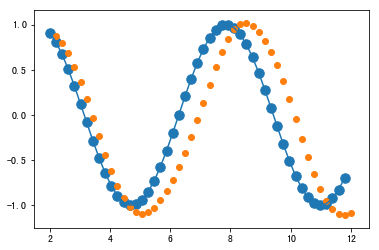

In [38]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr)
hidden_prev = torch.zeros(1,1,hidden_size)
for epoch in range(6000):
    start = np.random.randint(3,size=1)[0]#产生一个0-3的随机数
    time_steps = np.linspace(start,start+10,num_time_step)
    data = np.sin(time_steps)
    data = data.reshape(num_time_step,1)
    
    x = torch.Tensor(data[:-1]).float().view(1,num_time_step-1,1)
    y = torch.Tensor(data[1:]).float().view(1,num_time_step-1,1)
    
    out,hidden_prev = model(x,hidden_prev)
    loss = criterion(out,y)
    hidden_prev = hidden_prev.detach()
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0 :
        print('epoch:{},loss:{}'.format(epoch,loss))
        
start = np.random.randint(3,size=1)[0]#产生一个0-3的随机数
time_steps = np.linspace(start,start+10,num_time_step)
data = np.sin(time_steps)
data = data.reshape(num_time_step,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_step-1,1)
y = torch.tensor(data[1:]).float().view(1,num_time_step-1,1)

predictions = []
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])
    
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.ravel(), s=90)
plt.plot(time_steps[:-1], x.ravel())

plt.scatter(time_steps[1:], predictions)
plt.show()

Iteration: 0 loss 0.5526787042617798
Iteration: 1000 loss 0.000330829294398427
Iteration: 2000 loss 0.0009250730508938432
Iteration: 3000 loss 0.00023615482496097684
Iteration: 4000 loss 0.00017761631170287728
Iteration: 5000 loss 0.00037565617822110653


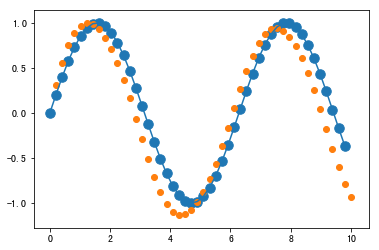

In [33]:
import  numpy as np
import  torch
import  torch.nn as nn
import  torch.optim as optim
from    matplotlib import pyplot as plt


num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr=0.01



class Net(nn.Module):

    def __init__(self, ):
        super(Net, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
        )
        for p in self.rnn.parameters():
          nn.init.normal_(p, mean=0.0, std=0.001)

        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):

       out, hidden_prev = self.rnn(x, hidden_prev)
       # [b, seq, h]
       out = out.view(-1, hidden_size)
       out = self.linear(out)
       out = out.unsqueeze(dim=0)
       return out, hidden_prev




model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)

hidden_prev = torch.zeros(1, 1, hidden_size)

for iter in range(6000):
    start = np.random.randint(3, size=1)[0]
    time_steps = np.linspace(start, start + 10, num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps, 1)
    x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
    y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

    output, hidden_prev = model(x, hidden_prev)
    hidden_prev = hidden_prev.detach()

    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    # for p in model.parameters():
    #     print(p.grad.norm())
    # torch.nn.utils.clip_grad_norm_(p, 10)
    optimizer.step()

    if iter % 1000 == 0:
        print("Iteration: {} loss {}".format(iter, loss.item()))

start = np.random.randint(3, size=1)[0]
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

predictions = []
input = x[:, 0, :]
for _ in range(x.shape[1]):
    input = input.view(1, 1, 1)
    (pred, hidden_prev) = model(input, hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])

x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.ravel(), s=90)
plt.plot(time_steps[:-1], x.ravel())

plt.scatter(time_steps[1:], predictions)
plt.show()